### IMPORT_LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

### LOAD_DATA

In [ ]:
df =pd.read_csv("water_potability.csv")

### DATA_EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
ab=df[df["Potability"]=="1"]

KeyError: 'Potability'

In [ ]:
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [ ]:
columns_name=df.columns
for col in df.columns:
    print(col)

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability


In [ ]:
df.duplicated().any()

False

### VISUALIZATION

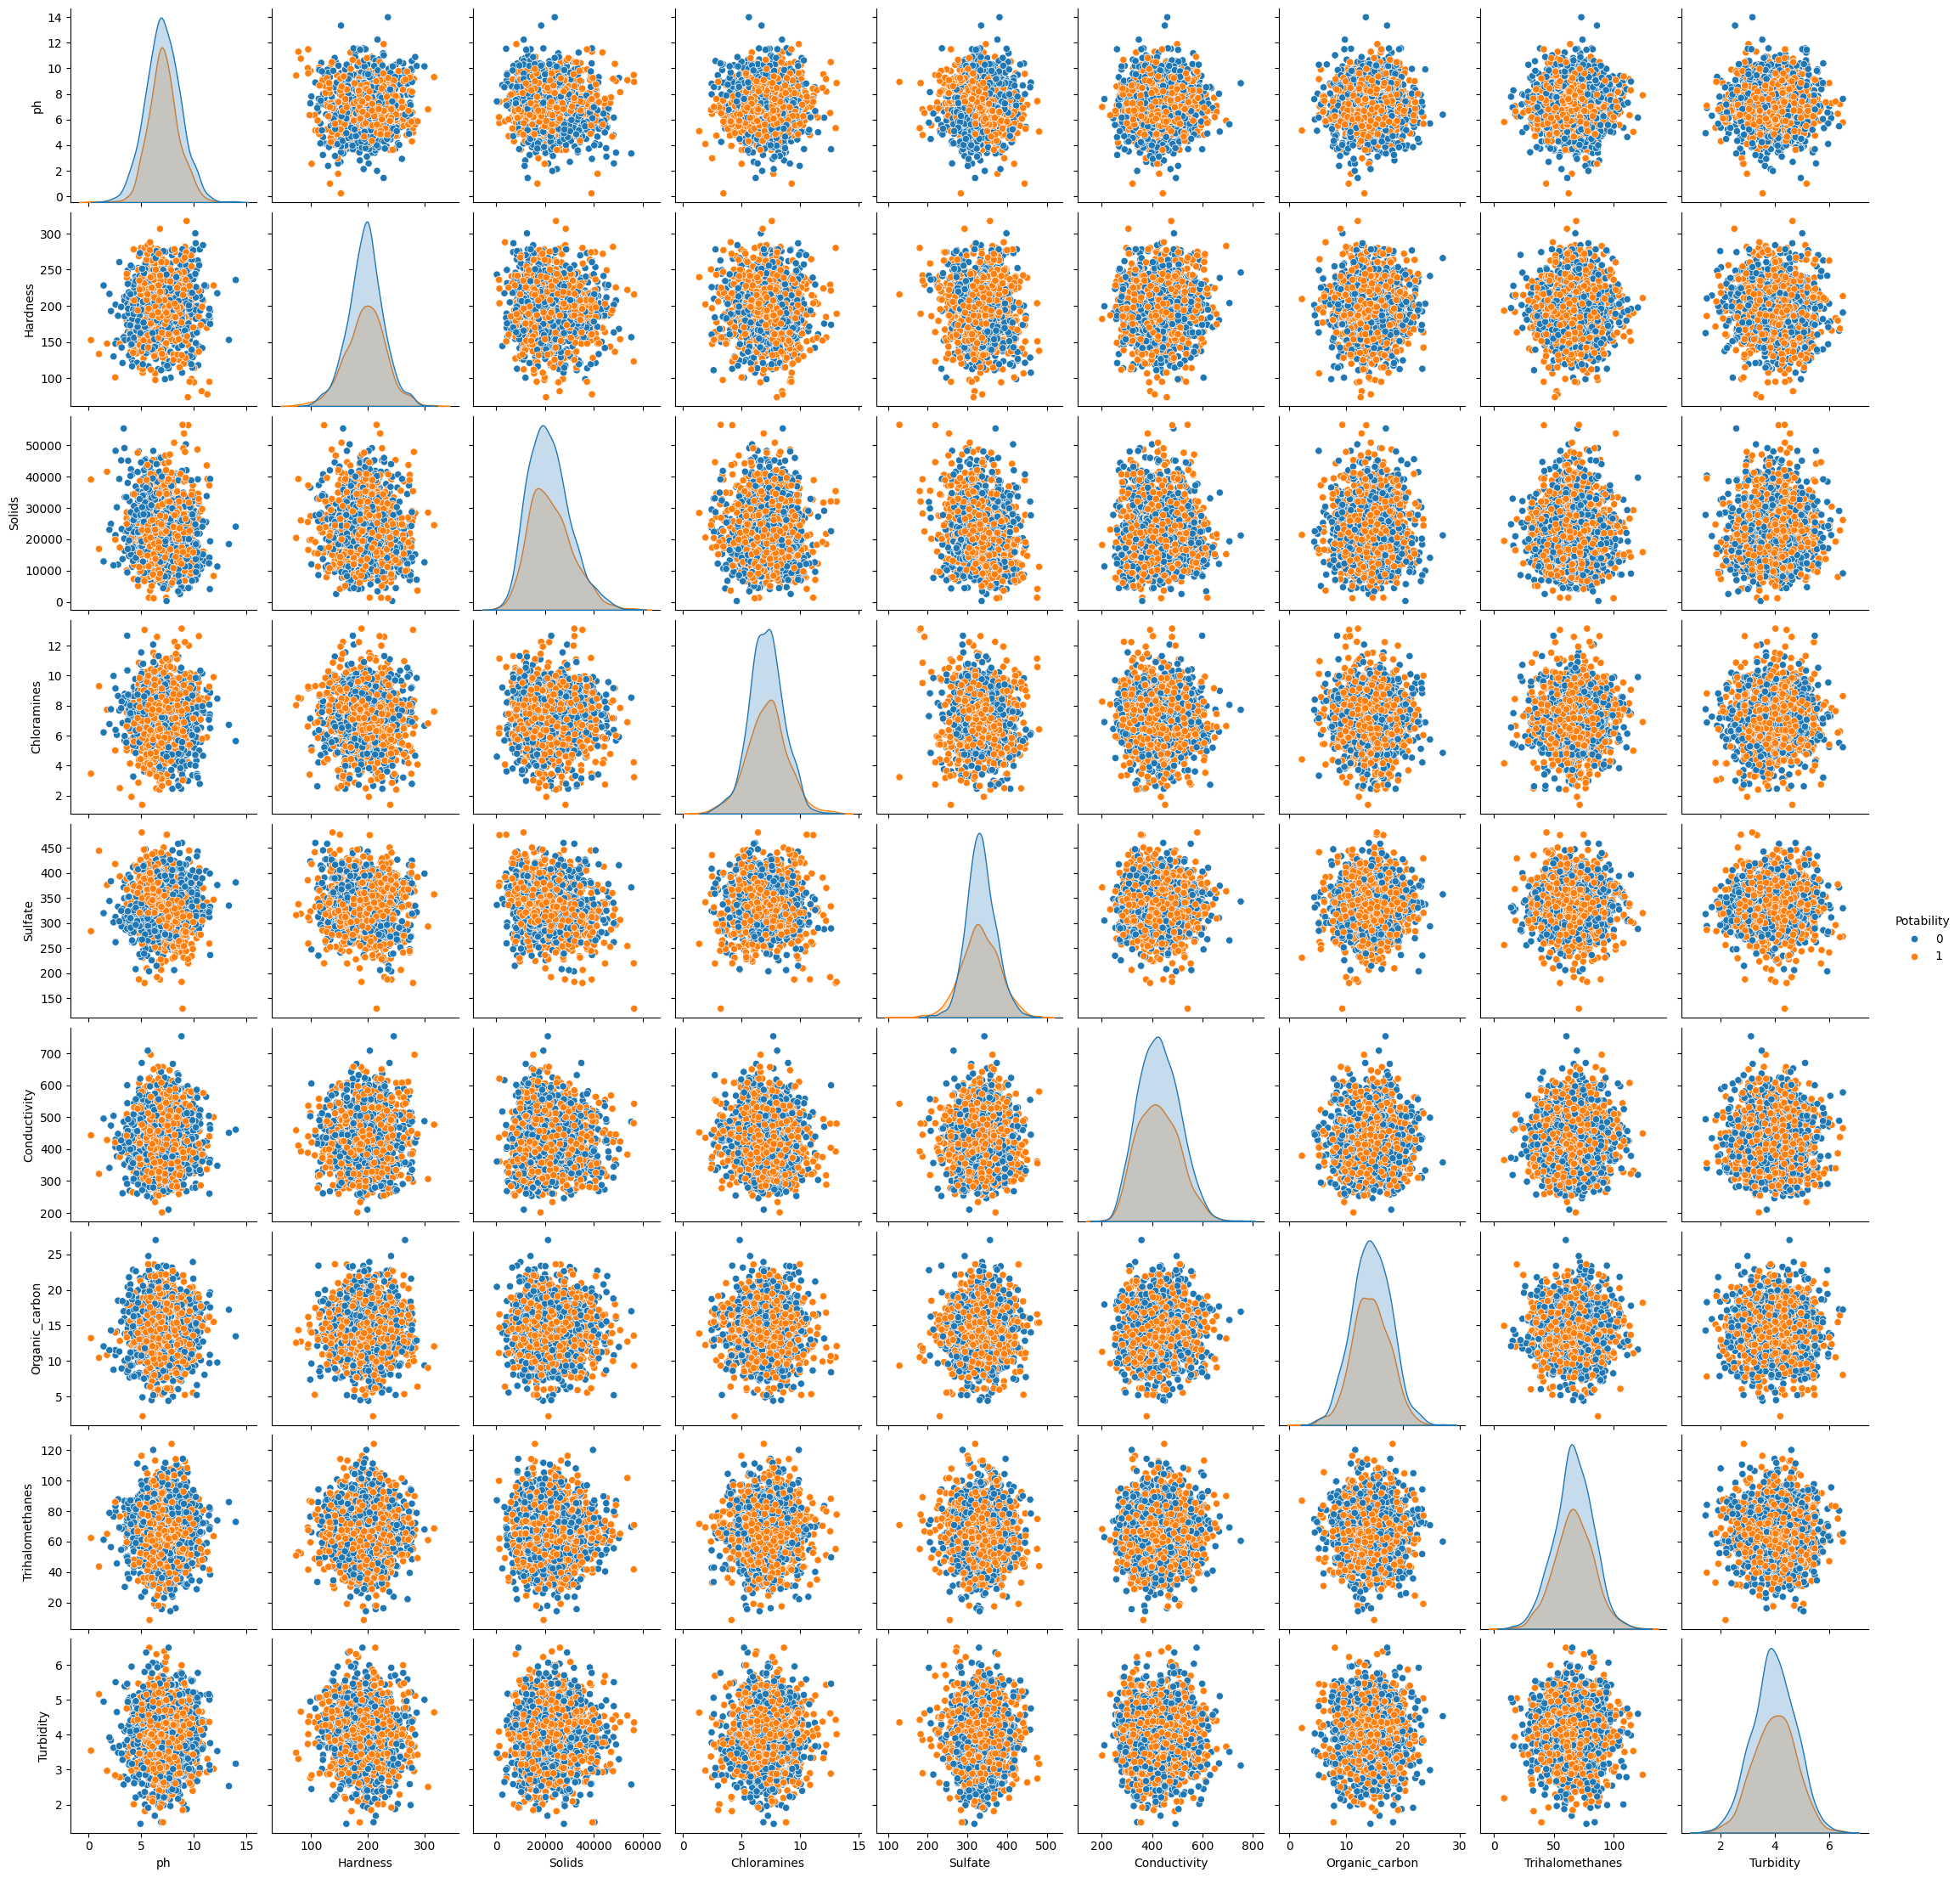

In [ ]:
sns.pairplot(df,hue='Potability')

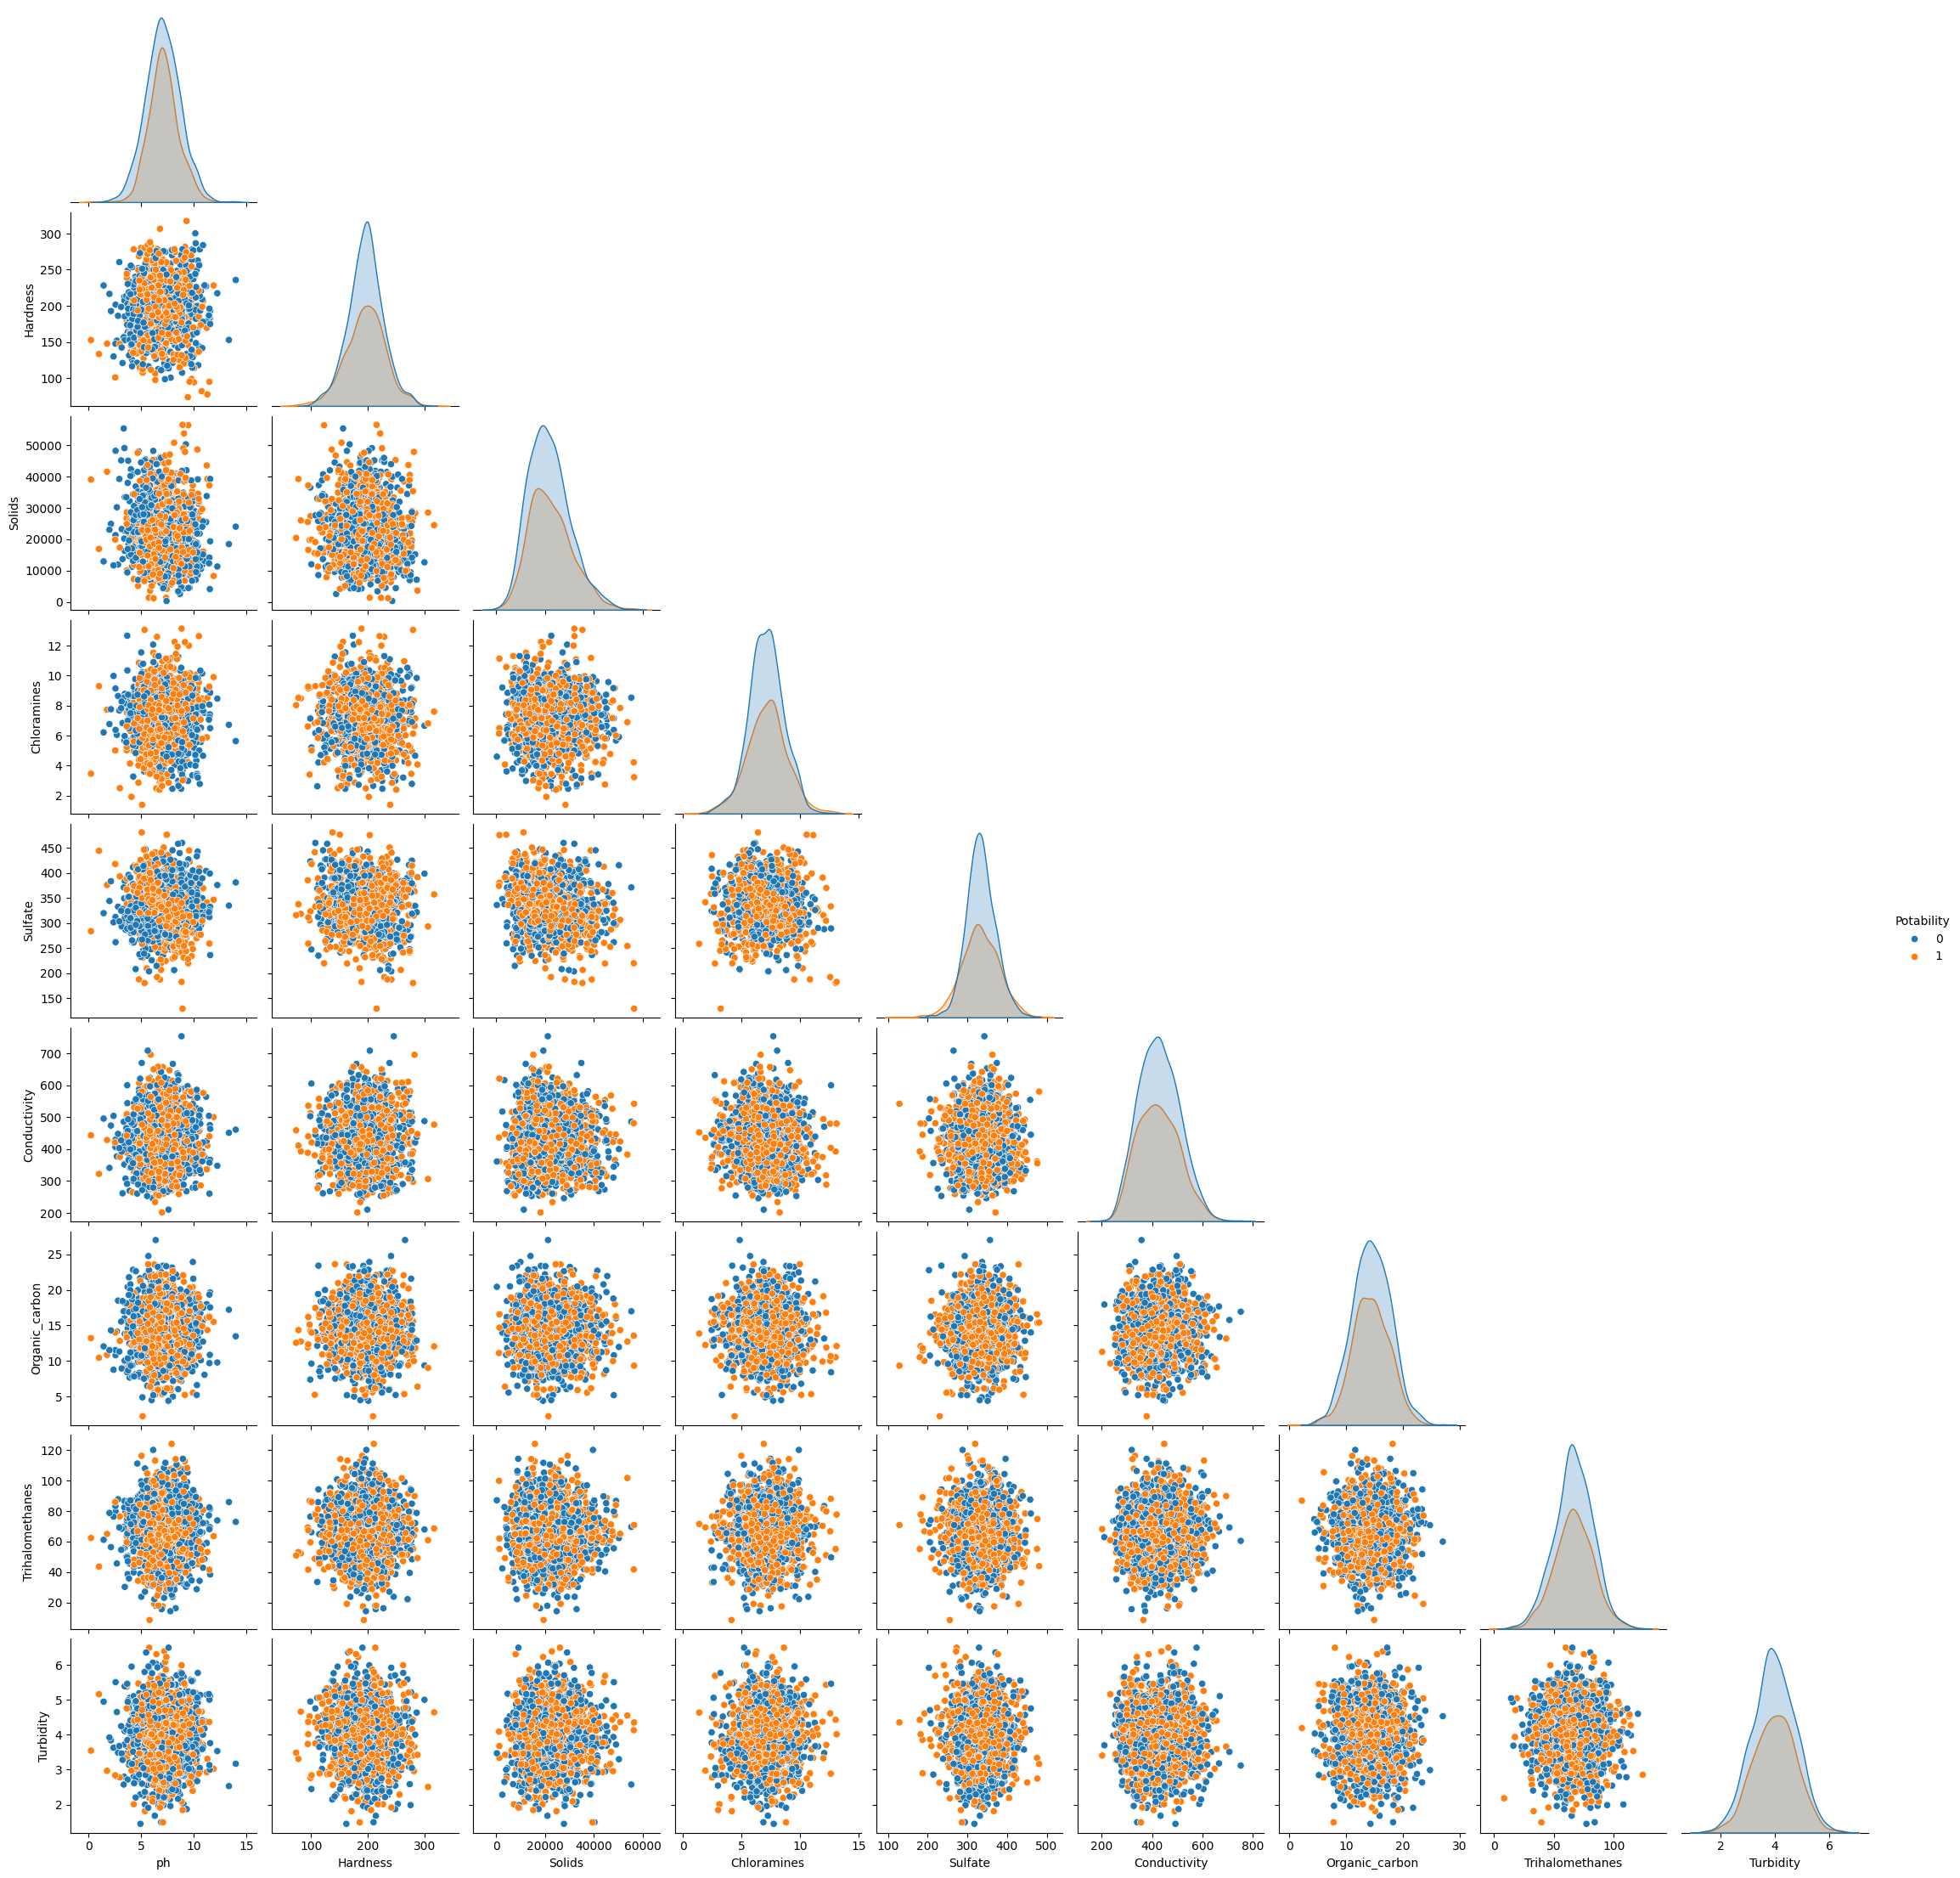

In [ ]:
sns.pairplot(df ,hue='Potability',corner=True)

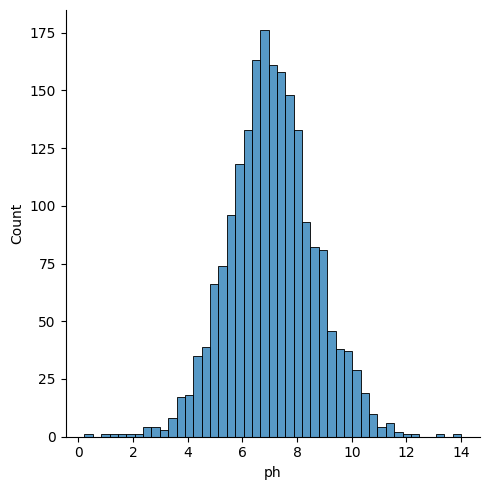

In [ ]:
sns.displot(df['ph'])

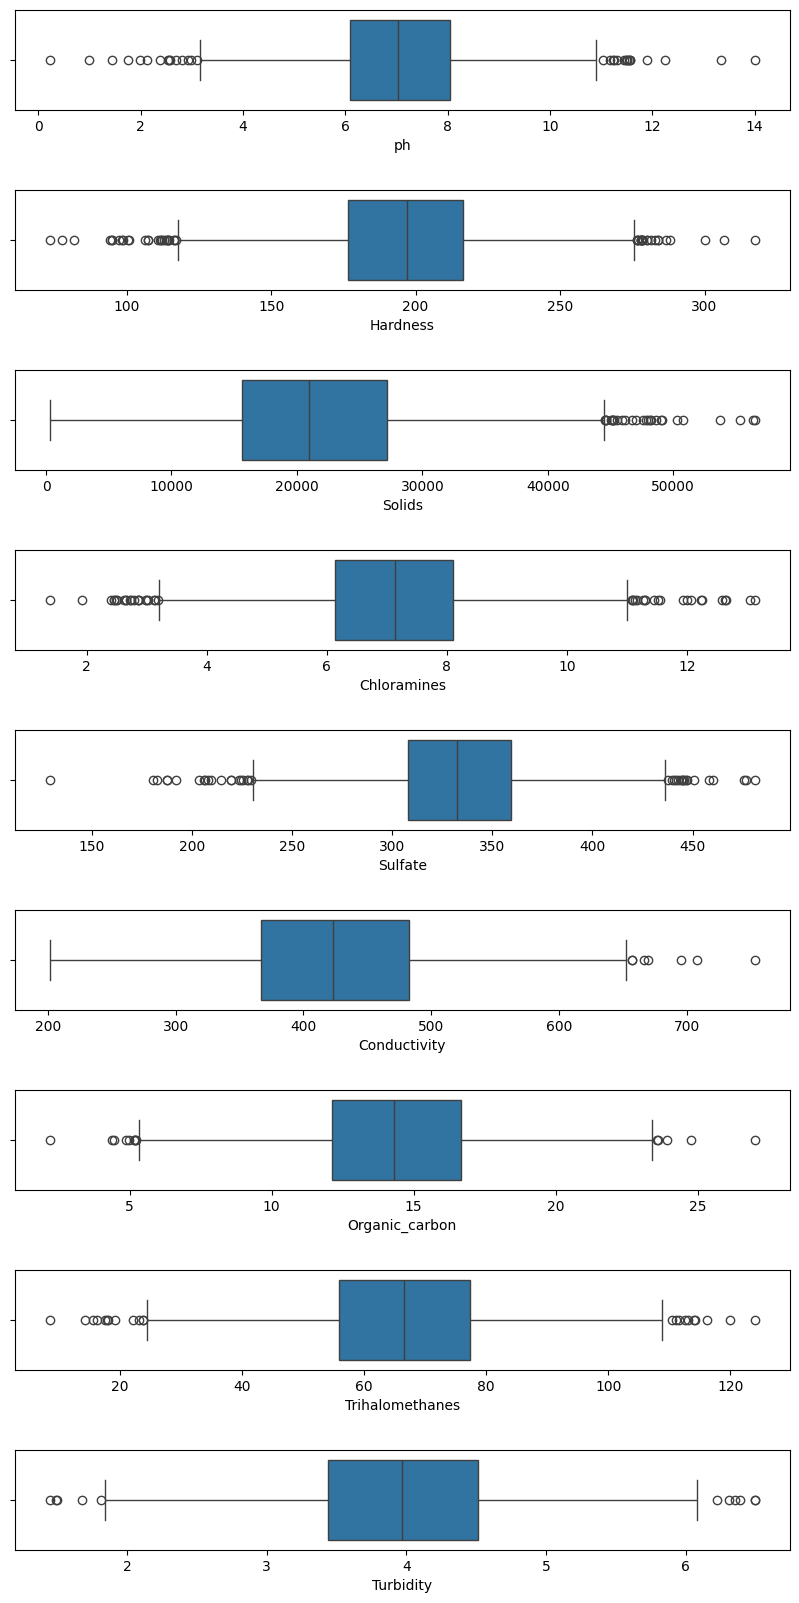

In [ ]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.80)
for i in range(9) :

    sns.boxplot(x=columns_name[i], data=df, ax=ax[i])

In [ ]:
p=df['Potability'].value_counts()
p

0    1200
1     811
Name: Potability, dtype: int64

([<matplotlib.patches.Wedge at 0x7b318d0c6860>,
 [Text(-0.32911438527483855, 1.0496112239325404, '0'),
  Text(0.3291144835465322, -1.0496111931186232, '1')])

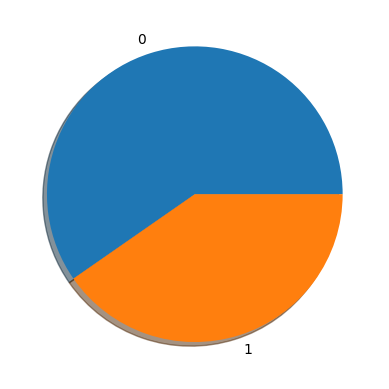

In [ ]:
plt.pie(p,labels=[0,1],shadow=True)

### SPLIT_DATA && NORMALIZATION

In [ ]:
x=df.drop("Potability",axis=1)
y=df.Potability

In [ ]:
x.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
5        8.399735        54.917862   2.559708  
6       13.789695        84.603556   2.672989  
7       12.363817        62.798309   4.401425

In [ ]:
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:

df.describe().loc[['min','max','std','mean']].T.style.background_gradient(axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [ ]:
ab=df[df['Potability']==1]

KeyError: 'Potability'

In [ ]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (1407, 9)
y_train shape =  (1407,)
x_test shape =  (604, 9)
y_test shape =  (604,)


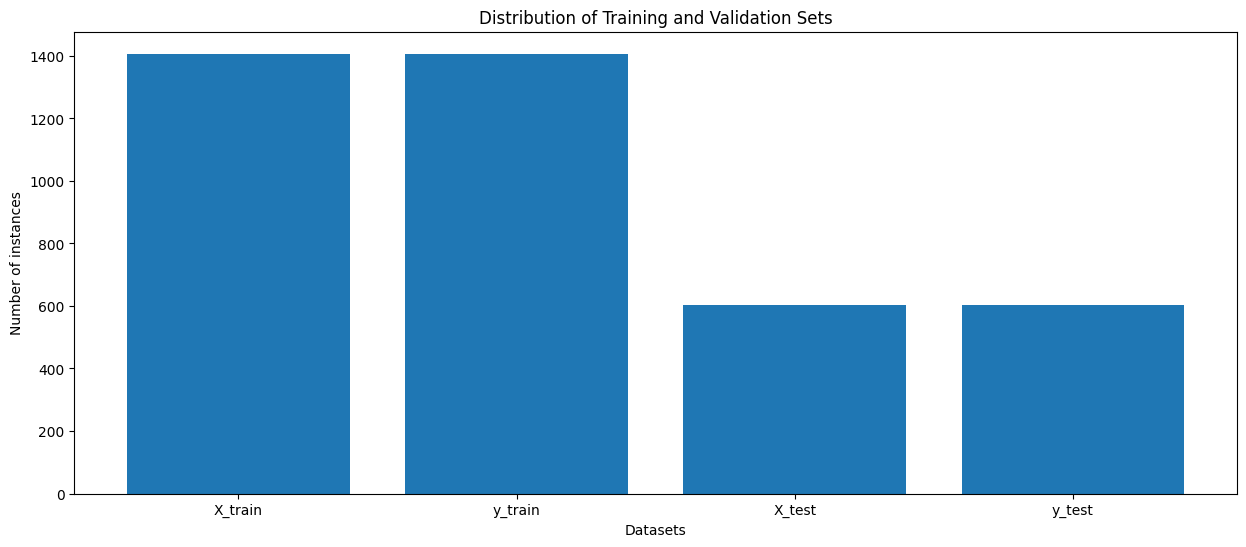

In [ ]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### MODELING_EVALUATION

### LOGICTIC REGRESSION MODEL


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
lr_model=LogisticRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

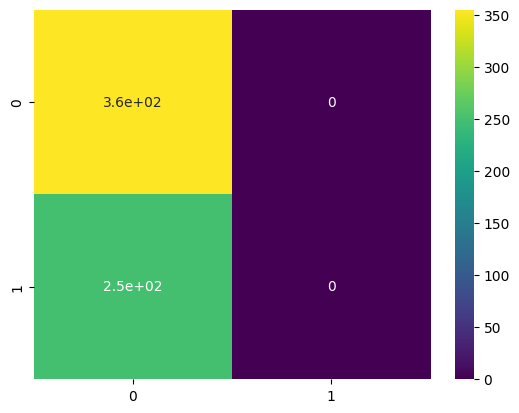

In [ ]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

In [ ]:
print("classification_report is ",classification_report(y_test ,y_pred))

classification_report is                precision    recall  f1-score   support

           0       0.59      1.00      0.74       355
           1       0.00      0.00      0.00       249

    accuracy                           0.59       604
   macro avg       0.29      0.50      0.37       604
weighted avg       0.35      0.59      0.44       604



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}
l_g_c=GridSearchCV(estimator=lr_model,param_grid=parameters,cv=20)

SVM_MODEL

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVC ## call model


In [ ]:
svm_model =SVC()

In [ ]:
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print("classification_report is ",classification_report(y_test ,y_pred))

classification_report is                precision    recall  f1-score   support

           0       0.59      1.00      0.74       355
           1       0.00      0.00      0.00       249

    accuracy                           0.59       604
   macro avg       0.29      0.50      0.37       604
weighted avg       0.35      0.59      0.44       604



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### DECISION_TREE_MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()


In [ ]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [ ]:
grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40]})

In [ ]:
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


In [ ]:
print(grid_search.best_score_)

0.6375230307160344


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)

In [ ]:
dt_pred = dt_model.predict(x_test)

In [ ]:
train_dt_pred = dt_model.predict(x_train)

In [ ]:
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       355
           1       0.63      0.31      0.41       249

    accuracy                           0.64       604
   macro avg       0.63      0.59      0.58       604
weighted avg       0.64      0.64      0.60       604



In [ ]:
print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.67      0.91      0.78       845
           1       0.72      0.33      0.46       562

    accuracy                           0.68      1407
   macro avg       0.70      0.62      0.62      1407
weighted avg       0.69      0.68      0.65      1407



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=10)

In [ ]:
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}
R_F_C_G_CV=GridSearchCV(estimator=model_RFC,param_grid=parameters,cv=20)


In [ ]:
model_RFC.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
score_RFC_train = model_RFC.score(x_train,y_train)
print(f"Train accuracy: {score_RFC_train}")

Train accuracy: 0.9751243781094527


In [ ]:
score_RFC_test = model_RFC.score(x_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

Test accuracy: 0.652317880794702


COMPARE WITH USED_MODEL

In [ ]:
result=pd.DataFrame({"ALGORITHM":["LogisticRegression","SVC","DecisionTreeClassifier"
                                  ,"RandomForestClassifier"],
          "accuracy":[ 0.59,0.59,0.64,.68] })
result.style.background_gradient()

In [ ]:
model_RFC.predict([[5.949519, 	160.442631 ,	16898.808297 ,	6.045906 ,	367.328542, 	451.012788 ,	16.359951 ,2.368234 ,	4.072198]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [ ]:
x_train[0:10]

ph    Hardness        Solids  Chloramines     Sulfate  \
904   5.949519  160.442631  16898.808297     6.045906  367.328542   
1729  5.345345  238.510230  10315.353973     7.822601  281.771707   
3047  5.039407  194.404170  19336.608073     7.194765  339.232126   
2206  8.801934  225.895468  23659.211520     2.458609  408.417866   
2131  7.191962  228.409943  15395.469082     7.398603  334.777619   
1360  8.281121  227.654351  17995.405219     7.493279  323.379987   
1571  7.896744  197.602078   9407.664039     9.610056  400.274579   
452   7.040245  192.955983  20988.429410     6.422359  320.948844   
2630  9.961503  276.699765  18743.222494     9.160740  361.221166   
1193  7.313447  158.707472  23154.062319     4.143329  276.550161   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
904     451.012788       16.359951        62.368234   4.072198  
1729    496.350875       12.624613        87.342833   2.362886  
3047    515.807182       10.728669        61.129517   3.126956  
2206    446.992465       14.340818        42.800911   3.769832  
2131    294.915584       13.932293        50.748365   4.102719  
1360    459.865512       14.363661        16.291505   3.687995  
1571    270.794059       11.300587        53.201848   4.889458  
452     381.357350       15.396455        88.298465   3.993410  
2630    457.551559       21.564489        93.740334   5.215590  
1193    436.517274       10.890085        87.912530   2.220640

In [ ]:
y_train[0:100]

904     0
1729    0
3047    0
2206    0
2131    0
       ..
279     1
2995    0
1139    1
144     0
2409    1
Name: Potability, Length: 100, dtype: int64

In [ ]:
model_RFC.predict([[7.313447 ,	158.707472, 	23154.062319 ,	4.143329, 	276.550161, 	436.517274, 	10.890085 ,	87.912530 ,	2.220640]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [ ]:
x_train[279]

KeyError: 279

In [ ]:
x_train[270:280]

ph    Hardness        Solids  Chloramines     Sulfate  \
782   7.998090  241.000277   9609.740605     9.842346  229.575561   
3040  5.470982  191.813046  36435.793514     7.369649  323.120036   
1071  7.774468  216.752872  22316.398284     7.947534  385.043438   
2642  4.891960  153.506232   9559.547392     7.847066  349.824390   
3068  5.620533  226.987836  27852.097439     6.521471  309.228091   
2127  8.978998  213.091772  19030.716876     5.291516  316.940333   
730   8.129342  211.123312  22982.927445     6.779005  326.397953   
896   7.027186  185.320701  30988.973019     8.600477  327.462670   
280   9.794559  129.870958  20682.731742     9.390843  291.980083   
630   7.918150  214.186611  23823.492888     7.290878  341.173322   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
782     428.882366       14.990567        39.842379   2.626547  
3040    383.871055       15.881382        52.765049   3.844020  
1071    288.068578       14.136699        68.861861   3.891097  
2642    496.872845       11.457624        61.110529   3.904270  
3068    414.061545       16.932911        78.439251   3.439476  
2127    473.150388       15.891079        66.087038   4.656317  
730     367.988784       13.910933        55.795357   4.822044  
896     326.269080        9.982010        52.716589   5.353043  
280     427.123948       11.853228        78.711469   2.945419  
630     411.424483       19.585002        25.057375   4.028958

In [ ]:
model_RFC.predict([[8.238996597	,199.5945387,	25046.79864,	9.288019857,	350.835986,	328.3633983	,18.74323079,	54.41696499,	3.089923749]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [ ]:
7.814524321	180.3473084	17516.69936	7.489006438	352.2770291	370.0113729	14.28931979	80.88242514	2.901699556


In [ ]:
model_RFC.predict([[7.814524321,	180.3473084,	17516.69936,	7.489006438	,352.2770291,	370.0113729	,14.28931979	,80.88242514	,2.901699556]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])